# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 허윤행, 김용현
## 1. Preprocess

In [37]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   


In [92]:
sample = pd.read_csv('../input/transdata.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (285331, 70)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,2015984141415,9,9,0,18,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285327,2015984141415,10,9,0,18,0,0,1,0,1,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
285328,2015984141415,11,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285329,2015984141415,12,9,0,18,0,0,1,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0


'''
‘accident_index’				// 사고 번호				type: object, Ex 201593401920
‘vehicle_reference’				// 차량 레퍼런스				type: int, 1 ~ 37
‘vehicle_type’					// 차량 종류				type: int, -1 ~ 98
‘towing_and_articulation’ 		// 직관적이고 관철적인 표현?	type: int -1 ~ 5
'vehicle_manoeuvre’ 			// 차량 기동				type: int
'vehicle_location-restricted_lane’	// 차량 위치 제한 차전
‘junction_location’				// 입장소?
‘skidding_and_overturning’	// 돌아가고 뒤집는다??
'hit_object_in_carriageway’	// 도로에서 물체에 박음
‘vehicle_leaving_carriageway’// 차로 이탈
'hit_object_off_carriageway’	// 도로에서 물체에 부딪힘
‘1st_point_of_impact’			// 1차 충돌
'was_vehicle_left_hand_drive?’	// 왼손잡이
‘journey_purpose_of_driver’	// 운전한 목적
‘sex_of_driver’					// 운전자 성별
'age_of_driver’					// 운전자 나이
‘age_band_of_driver’			// 운전자 연령대
'engine_capacity_(cc)’			// 엔진 용량(단위: cc)
‘propulsion_code’				// 추진 코드?
‘age_of_vehicle’				// 차량 나이
‘driver_imd_decile’				// 운전자 imd decile?
'driver_home_area_type’		// 운전자 home area?
‘vehicle_imd_decile’			// 차량 imd decile?
'NUmber_of_Casualities_unique_to_accident_index’		// 사고 번호의 캐주얼 수?
'No_of_Vehicles_involved_unique_to_accident_index’	// 사고 번호와 연관된 차량 없음?
‘location_easting_osgr’		// ????
‘location_northing_osgr’		// ???
'longitude’						// 경도
‘latitude’						// 위도
‘police_force’					// 경찰 유무?
‘accident_severity’				// 사고 심각도 type: int 0~3
'number_of_vehicles’			// 사고 차량 수
‘number_of_casualties’			// 사상자 수
‘date’								// 날짜
‘day_of_week’					// 요일
'time’								// 시간
'local_authority_(district)’	// 지방 구역
'local_authority_(highway)’	// 지방 권한
‘1st_road_class’				// 1등급 도로?
‘1st_road_number’				// 1등급 도로 번호?
‘road_type’						// 도로 종류
'speed_limit’					// 제한 속도
‘junction_detail’				// ?
‘junction_control’				// ?
'2nd_road_class’				// 2등급?
‘2nd_road_number’				// 2등급!
'pedestrian_crossing-human_control’		// 보행자 통제
'pedestrian_crossing-physical_facilities’	// 보행자 ??
'light_conditions’				// 빛 조건
‘weather_conditions’			// 날씨
'road_surface_conditions’		// 도로 표면 상태
‘special_conditions_at_site’	// 현장의 특수한 조건
‘carriageway_hazards’			// 위험도?
‘urban_or_rural_area’			// 도시인지 농촌인지
‘did_police_officer_attend_scene_of_accident’	// 경찰관이 사고 현장에 참석했는가
‘lsoa_of_accident_location’	// 사고 현장의 lsoa?
‘casualty_reference’			// 피해자 레퍼런스
'casualty_class’				// 피해자 종류
‘sex_of_casualty’				// 피해자 성별
‘age_of_casualty’				// 피해자 나이
'age_band_of_casualty’			// 피해자 연령대
‘casualty_severity’				// 피해자 심각도
‘pedestrian_location’			// 보행자 위치
'pedestrian_movement’			// 보해앚 행동
‘car_passenger’					// 보행자
'bus_or_coach_passenger’		// 버스 승객?
‘pedestrian_road_maintenance_worker’	// ??
'casualty_type’					// 피해자 종류
‘casualty_home_area_type’		// 피해자의 home area?
'casualty_imd_decile’			// 피해자 imd decile?
'''

In [93]:
sample.dtypes

accident_index                         object
vehicle_reference                       int64
vehicle_type                            int64
towing_and_articulation                 int64
vehicle_manoeuvre                       int64
                                       ...   
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
Length: 70, dtype: object

In [94]:
sample.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,...,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000
mean,1.557030,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,...,6.245512,2.862462,0.672277,0.481631,0.255992,0.079383,0.060428,7.277414,1.045665,3.848236
std,0.760106,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1.393303,2.168011,...,2.386162,0.370414,1.951045,1.663396,0.575932,0.534076,0.345463,7.506004,0.959294,3.491443
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [95]:
# 결측값 비율
sample.isnull().sum() / sample.shape[0]

accident_index                        0.000000
vehicle_reference                     0.000000
vehicle_type                          0.000000
towing_and_articulation               0.000000
vehicle_manoeuvre                     0.000000
                                        ...   
bus_or_coach_passenger                0.347873
pedestrian_road_maintenance_worker    0.347873
casualty_type                         0.347873
casualty_home_area_type               0.347873
casualty_imd_decile                   0.347873
Length: 70, dtype: float64

In [96]:
sample.rename(columns={"vehicle_type":"가해차종", "road_surface_conditions":"노면상태", "pedestrian_movement" : "보행자이동", "light_conditions" : "빛 세기", "junction_location" : "사고 위치", " junction_detail" : "사고 세부사항", "junction_control":"사고 조절"}, inplace=True)


In [97]:
sample.columns

Index(['accident_index', 'vehicle_reference', '가해차종',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', '사고 위치', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', '1st_point_of_impact',
       'was_vehicle_left_hand_drive?', 'journey_purpose_of_driver', '가해자성별',
       '가해자나이', 'age_band_of_driver', 'engine_capacity_(cc)',
       'propulsion_code', '차량년식', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', '사고내용', 'number_of_vehicles',
       'number_of_casualties', 'date', '요일', 'time',
       'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',


In [98]:
df2 = sample[['사고내용','도로형태 대분류','기상상태','차량년식','가해자성별','가해자나이','요일', '가해차종', '노면상태', '보행자이동', '빛 세기', '사고 위치', '사고 조절']]
df2

,사고내용,도로형태 대분류,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 조절
0,3,0,1,11,1,45,2,9,1,NaN,1,8,4
1,3,0,1,1,2,25,7,9,1,NaN,1,8,2
2,3,0,1,-1,1,51,7,9,1,0.0,1,8,2
3,3,0,1,1,1,50,4,20,1,1.0,1,0,-1
4,3,0,1,-1,1,27,6,9,1,NaN,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,3,0,3,1,1,57,5,9,4,NaN,6,0,-1
285327,3,0,3,-1,1,19,5,9,4,0.0,6,0,-1
285328,3,0,3,5,1,-1,5,9,4,NaN,6,0,-1
285329,3,0,3,15,1,29,5,9,4,0.0,6,0,-1


In [99]:
arr_cartype = ['NaN','자전거','50cc','125cc','500cc','500cc 이상','NaN','NaN','택시','자가용','승합차','버스','NaN','NaN','NaN','NaN','기타', '농기계','트럭','3.5t급 미만','7.5t급 미만','7.5t급 이상','스쿠터','전기차']
arr_roadtype = ['특이사항 없음','신호등 꺼짐상태','신호등 이상','보행자 신호','인도 위 사고','노면상태 결함','미끄러움','질퍽한 도로']
arr_weather = ['NaN','맑음','비','눈','바람','폭풍우','눈보라','안개','기타','불명']
arr_sex = ['NaN','남성','여성','NaN']
arr_day = ['NaN','일','월','화','수','목','금','토']
arr_roadstate = ['NaN','건조','젖음','눈','얼음','3cm이상 물에 잠김','미끄러움','질퍽한 도로']
arr_ped = ['보행자가 아님','운전자 주변 사고','표지판 무시 운전자 주변 사고','운전자 정면에서 보행 중 사고','표지판 무시 운전자 정면 사고','교차로에서 사고','교차로에서 표지판 무시 운전자 사고','교차로에서 보행 중 사고','교차로에서 역 방향 보행 중 사고','기타/불명']
arr_light = ['NaN','밝음','NaN','NaN','조명 있음','어두움','조명 없음','기타/불명']
arr_junloc = ['20m내에 교차로 없음','교차로 접근로','비어있는 교차로','회전교차로 출구','회전 교차로 입구','주 도로 출구','주 도로 입구','경사로 진입로','위험로']
arr_juncon = ['20m내에 교차로 없음','교통 정리 경찰','신호등','정지 신호','일방 통행']
arr_target = ['NaN', '사망', '중상', '경상']


In [100]:
df2.rename(columns = {"도로형태 대분류" : "사고 시 특이사항" , "사고 조절" : "사고 시 통제 방법"},inplace= True) 
df2.replace(-1, np.nan, inplace=True) # Same as previously 

df2

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
0,3,0.0,1,11.0,1.0,45.0,2,9.0,1.0,NaN,1,8.0,4.0
1,3,0.0,1,1.0,2.0,25.0,7,9.0,1.0,NaN,1,8.0,2.0
2,3,0.0,1,NaN,1.0,51.0,7,9.0,1.0,0.0,1,8.0,2.0
3,3,0.0,1,1.0,1.0,50.0,4,20.0,1.0,1.0,1,0.0,NaN
4,3,0.0,1,NaN,1.0,27.0,6,9.0,1.0,NaN,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,3,0.0,3,1.0,1.0,57.0,5,9.0,4.0,NaN,6,0.0,NaN
285327,3,0.0,3,NaN,1.0,19.0,5,9.0,4.0,0.0,6,0.0,NaN
285328,3,0.0,3,5.0,1.0,NaN,5,9.0,4.0,NaN,6,0.0,NaN
285329,3,0.0,3,15.0,1.0,29.0,5,9.0,4.0,0.0,6,0.0,NaN


In [101]:
df2.isnull().sum()

사고내용               0
사고 시 특이사항        217
기상상태               0
차량년식           87802
가해자성별             20
가해자나이          30278
요일                 0
가해차종              58
노면상태             545
보행자이동          99261
빛 세기               0
사고 위치             72
사고 시 통제 방법    112867
dtype: int64

In [102]:
def change_numeric_to_categorical(arr,data):
    sam = []
    pri
    data = data.astype('int')
    for a in data:
        if(a >= 90):
            sam.append(a)
        elif(a >= 0):
            sam.append(arr[a])
        else:
            sam.append(a)
    return sam

In [105]:
df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()

print(df2.shape)
df2

(72250, 13)


,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
6,3,0.0,1,8.0,2.0,27.0,5,3.0,1.0,0.0,7,2.0,2.0
8,3,0.0,1,1.0,1.0,24.0,5,9.0,1.0,2.0,1,1.0,2.0
14,3,0.0,1,1.0,2.0,23.0,4,9.0,1.0,0.0,1,8.0,4.0
25,3,0.0,1,8.0,2.0,48.0,7,9.0,1.0,0.0,1,8.0,4.0
26,3,0.0,1,7.0,2.0,47.0,5,9.0,1.0,3.0,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0.0,1,12.0,2.0,50.0,3,9.0,2.0,1.0,4,1.0,4.0
285307,3,0.0,1,11.0,2.0,24.0,4,9.0,2.0,0.0,1,8.0,4.0
285312,3,0.0,2,7.0,2.0,75.0,7,9.0,2.0,0.0,1,1.0,4.0
285313,3,0.0,2,4.0,1.0,20.0,7,9.0,2.0,0.0,1,7.0,4.0


In [106]:
df2['사고 시 특이사항'] = change_numeric_to_categorical(arr_roadtype,df2['사고 시 특이사항'])
df2['기상상태'] = change_numeric_to_categorical(arr_weather,df2['기상상태'])
df2['가해자성별']=change_numeric_to_categorical(arr_sex,df2['가해자성별'])
df2['요일']=change_numeric_to_categorical(arr_day,df2['요일'])
df2['가해차종'] = change_numeric_to_categorical(arr_cartype,df2['가해차종'])
df2['노면상태'] = change_numeric_to_categorical(arr_roadstate,df2['노면상태'])
df2['보행자이동'] = change_numeric_to_categorical(arr_ped,df2['보행자이동'])
df2['빛 세기']= change_numeric_to_categorical(arr_light,df2['빛 세기'])
df2['사고 위치'] = change_numeric_to_categorical(arr_junloc,df2['사고 위치'])
df2['사고 시 통제 방법'] = change_numeric_to_categorical(arr_juncon,df2['사고 시 통제 방법'])

df2

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
6,3,특이사항 없음,맑음,8.0,여성,27.0,목,125cc,건조,보행자가 아님,기타/불명,비어있는 교차로,신호등
8,3,특이사항 없음,맑음,1.0,남성,24.0,목,자가용,건조,표지판 무시 운전자 주변 사고,밝음,교차로 접근로,신호등
14,3,특이사항 없음,맑음,1.0,여성,23.0,수,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
25,3,특이사항 없음,맑음,8.0,여성,48.0,토,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
26,3,특이사항 없음,맑음,7.0,여성,47.0,목,자가용,건조,운전자 정면에서 보행 중 사고,밝음,위험로,일방 통행
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,특이사항 없음,맑음,12.0,여성,50.0,화,자가용,젖음,운전자 주변 사고,조명 있음,교차로 접근로,일방 통행
285307,3,특이사항 없음,맑음,11.0,여성,24.0,수,자가용,젖음,보행자가 아님,밝음,위험로,일방 통행
285312,3,특이사항 없음,비,7.0,여성,75.0,토,자가용,젖음,보행자가 아님,밝음,교차로 접근로,일방 통행
285313,3,특이사항 없음,비,4.0,남성,20.0,토,자가용,젖음,보행자가 아님,밝음,경사로 진입로,일방 통행


In [107]:
df2.dtypes

사고내용            int64
사고 시 특이사항      object
기상상태           object
차량년식          float64
가해자성별          object
가해자나이         float64
요일             object
가해차종           object
노면상태           object
보행자이동          object
빛 세기           object
사고 위치          object
사고 시 통제 방법     object
dtype: object

In [108]:
df2.isnull().sum() / df2.shape[0]

사고내용          0.0
사고 시 특이사항     0.0
기상상태          0.0
차량년식          0.0
가해자성별         0.0
가해자나이         0.0
요일            0.0
가해차종          0.0
노면상태          0.0
보행자이동         0.0
빛 세기          0.0
사고 위치         0.0
사고 시 통제 방법    0.0
dtype: float64

In [109]:
df2['사고내용'] = change_numeric_to_categorical(arr_target,df2['사고내용'])


# 결측값 확인 및 제거

In [76]:
pd.crosstab(df2['가해차종'], df2['사고내용'], margins=True)


사고내용,경상,사망,중상,All
가해차종,,,,
125cc,3741,33,940,4714
3.5t급 미만,1784,26,257,2067
500cc,799,18,259,1076
500cc 이상,2356,103,1144,3603
50cc,919,2,183,1104
7.5t급 미만,78,4,18,100
7.5t급 이상,160,33,60,253
농기계,12,1,2,15
버스,2343,28,306,2677


In [77]:
df2 = df2[df2['가해차종'] != 90]
df2 = df2[df2['가해차종'] != 97]
df2 = df2[df2['가해차종'] != 98]


In [110]:
pd.crosstab(df2['가해차종'], df2['사고내용'], margins=True)


사고내용,경상,사망,중상,All
가해차종,,,,
90,68,3,20,91
97,48,0,14,62
98,41,0,7,48
125cc,3741,33,940,4714
3.5t급 미만,1784,26,257,2067
500cc,799,18,259,1076
500cc 이상,2356,103,1144,3603
50cc,919,2,183,1104
7.5t급 미만,78,4,18,100


## 임시 파일 저장

In [79]:
df2.to_csv('../input/TAAS_data.csv', encoding='utf-8-sig',index_label=False)


# 시각화 파트

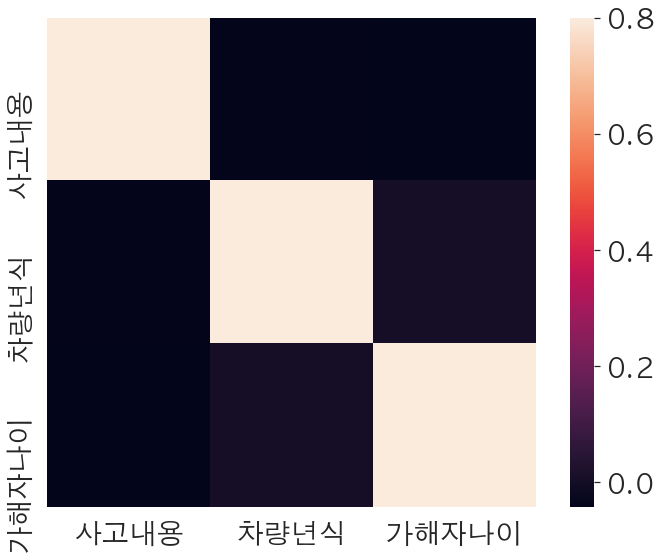

In [21]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

Index(['사고내용', '차량년식', '가해자나이'], dtype='object')


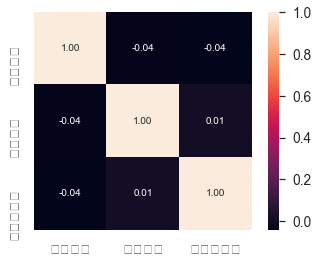

In [22]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, '사고내용')['사고내용'].index
print(cols)
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
df2.head()

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
6,3,특이사항 없음,맑음,8.0,여성,27.0,목,125cc,건조,보행자가 아님,기타/불명,비어있는 교차로,신호등
8,3,특이사항 없음,맑음,1.0,남성,24.0,목,자가용,건조,표지판 무시 운전자 주변 사고,밝음,교차로 접근로,신호등
14,3,특이사항 없음,맑음,1.0,여성,23.0,수,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
25,3,특이사항 없음,맑음,8.0,여성,48.0,토,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
26,3,특이사항 없음,맑음,7.0,여성,47.0,목,자가용,건조,운전자 정면에서 보행 중 사고,밝음,위험로,일방 통행


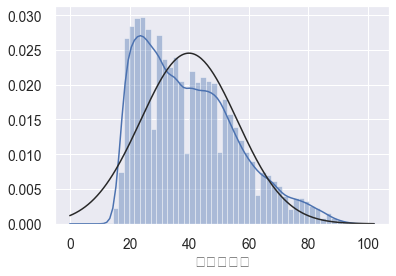

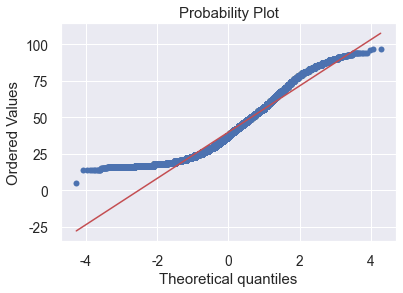

In [24]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df2['가해자나이'], fit=norm);
fig = plt.figure()
res = stats.probplot(df2['가해자나이'], plot=plt)
plt.show()

In [25]:
df2['가해자나이'] = np.log1p(df2['가해자나이']) 


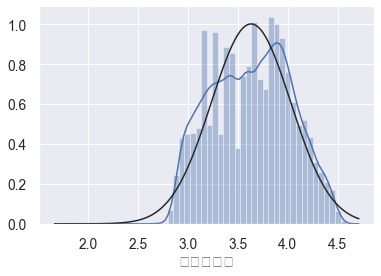

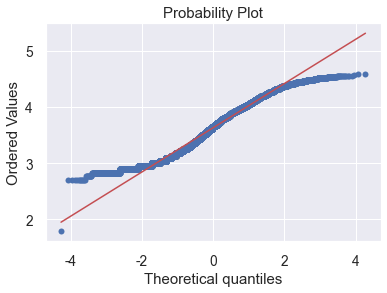

In [26]:
sns.distplot(df2['가해자나이'], fit=norm);
fig = plt.figure()
res = stats.probplot(df2['가해자나이'], plot=plt)
plt.show()

In [28]:
df2

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
6,3,특이사항 없음,맑음,8.0,여성,3.332205,목,125cc,건조,보행자가 아님,기타/불명,비어있는 교차로,신호등
8,3,특이사항 없음,맑음,1.0,남성,3.218876,목,자가용,건조,표지판 무시 운전자 주변 사고,밝음,교차로 접근로,신호등
14,3,특이사항 없음,맑음,1.0,여성,3.178054,수,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
25,3,특이사항 없음,맑음,8.0,여성,3.891820,토,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
26,3,특이사항 없음,맑음,7.0,여성,3.871201,목,자가용,건조,운전자 정면에서 보행 중 사고,밝음,위험로,일방 통행
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,특이사항 없음,맑음,12.0,여성,3.931826,화,자가용,젖음,운전자 주변 사고,조명 있음,교차로 접근로,일방 통행
285307,3,특이사항 없음,맑음,11.0,여성,3.218876,수,자가용,젖음,보행자가 아님,밝음,위험로,일방 통행
285312,3,특이사항 없음,비,7.0,여성,4.330733,토,자가용,젖음,보행자가 아님,밝음,교차로 접근로,일방 통행
285313,3,특이사항 없음,비,4.0,남성,3.044522,토,자가용,젖음,보행자가 아님,밝음,경사로 진입로,일방 통행


In [31]:
pd.crosstab(df2['가해자성별'], df2['사고내용'], margins=True)


사고내용,1,2,3,All
가해자성별,,,,
NaN,0,9,54,63
남성,539,6663,39099,46301
여성,130,2237,23519,25886
All,669,8909,62672,72250


## Save file

In [27]:

df2.to_csv('../input/final.csv', encoding='utf-8-sig',index_label=False)

